In [1]:
# Import necessary libraries

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
api_key = ''        #API key

In [3]:
categories = ['entertainment', 'technology', 'health']          # Categories to extract data

In [4]:
url =f'https://newsapi.org/v2/top-headlines'

In [5]:
all_articles = []                       # A list to store all articles

In [ ]:
for category in categories:            # Loop through each cateogry
   request_parameters ={
      'apikey' : api_key,
      'country' : 'us',
      'category' : category,
      'pageSize' : 100}
   
   response = requests.get(url, params=request_parameters)

   # If response was susscessful, pars JSON and extract articles
   if response.status_code == 200:
        articles = response.json()['articles']

        for article in articles:          # Loop through each article 
             all_articles.append({
                'source' : article.get('source').get('name'),
                'author' : article.get('author'),
                'title' : article.get('title'),
                'category' : category,
                'description' : article.get('description'),
                'url' : article.get('url'),
                'urlToImage' : article.get('urlToImage'),
                'publishedAt' : article.get("publishedAt"),
                'content' : article.get('content')})
             
        print(f"Fetched {len(articles)} articles for category: {category}") 
   else:
               print(f"Error fetching category {category} - Status code: {response.status_code}")

Fetched 44 articles for category: entertainment
Fetched 65 articles for category: technology
Fetched 58 articles for category: health


In [15]:
all_articles

[{'source': 'Gizmodo.com',
  'author': 'Lucas Ropek',
  'title': 'Despite Online MAGA Freakout About Her Jeans, Sydney Sweeney’s New Movie Bombs - Gizmodo',
  'category': 'entertainment',
  'description': "Sometimes it's good to remember that the internet is not a real place.",
  'url': 'https://gizmodo.com/despite-online-maga-freakout-about-her-jeans-sydney-sweeneys-new-movie-bombs-2000644565',
  'urlToImage': 'https://gizmodo.com/app/uploads/2025/08/sydney-sweeney-and-donald-trump-1200x675.jpg',
  'publishedAt': '2025-08-18T21:30:42Z',
  'content': 'A couple of weeks ago, American Eagle launched a new ad campaign for its blue jeans line that featured actress Sydney Sweeney. In one of the ads, Sweeney weirdly broached the topic of genetics (she s… [+3868 chars]'},
 {'source': 'NBC News',
  'author': 'Tim Stelloh',
  'title': "'Ketamine Queen' to plead guilty in Matthew Perry's death, officials say - NBC News",
  'category': 'entertainment',
  'description': 'A California woman known a

In [16]:
# Insert articles in a dataframe
df = pd.DataFrame(all_articles)

In [17]:
df.head()           # View first 5 rows

,source,author,title,category,description,url,urlToImage,publishedAt,content
0,Gizmodo.com,Lucas Ropek,"Despite Online MAGA Freakout About Her Jeans, ...",entertainment,Sometimes it's good to remember that the inter...,https://gizmodo.com/despite-online-maga-freako...,https://gizmodo.com/app/uploads/2025/08/sydney...,2025-08-18T21:30:42Z,"A couple of weeks ago, American Eagle launched..."
1,NBC News,Tim Stelloh,'Ketamine Queen' to plead guilty in Matthew Pe...,entertainment,A California woman known as the “Ketamine Quee...,https://www.nbcnews.com/news/us-news/ketamine-...,https://media-cldnry.s-nbcnews.com/image/uploa...,2025-08-18T20:40:13Z,A California woman known as the Ketamine Queen...
2,Las Vegas Review-Journal,John Katsilometes,"Fake Justin Bieber banned by Strip resort, tag...",entertainment,A veteran Justin Bieber lookalike managed to t...,https://neon.reviewjournal.com/post/3319138,https://neon.reviewjournal.com/wp-content/uplo...,2025-08-18T20:15:00Z,This “JustinBieber” is a total fake.\r\nA Bieb...
3,NPR,,What we lose in the gamification of music - NPR,entertainment,Music shouldn't be treated like a game to mast...,https://www.npr.org/2025/08/18/g-s1-83310/tayl...,https://npr.brightspotcdn.com/dims3/default/st...,2025-08-18T20:00:08Z,This essay first appeared in the NPR Music new...
4,Deadline,Anthony D'Alessandro,Legendary In Talks For Global Theatrical Outpu...,entertainment,"Legendary, the producers of Dune and Monsterve...",http://deadline.com/2025/08/paramount-legendar...,https://deadline.com/wp-content/uploads/2025/0...,2025-08-18T19:23:00Z,EXCLUSIVE: Here’s another big deal that the ne...


In [ ]:
# Save the extracted data as a csv file for reproducibility

df.to_csv('news_articles.csv', index=False)

#### Loading the data 

In [2]:
news = pd.read_csv('news_articles.csv')

In [3]:
# Display the full data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# View the data
news

,source,author,title,category,description,url,urlToImage,publishedAt,content
0,Gizmodo.com,Lucas Ropek,"Despite Online MAGA Freakout About Her Jeans, ...",entertainment,Sometimes it's good to remember that the inter...,https://gizmodo.com/despite-online-maga-freako...,https://gizmodo.com/app/uploads/2025/08/sydney...,2025-08-18T21:30:42Z,"A couple of weeks ago, American Eagle launched..."
1,NBC News,Tim Stelloh,'Ketamine Queen' to plead guilty in Matthew Pe...,entertainment,A California woman known as the “Ketamine Quee...,https://www.nbcnews.com/news/us-news/ketamine-...,https://media-cldnry.s-nbcnews.com/image/uploa...,2025-08-18T20:40:13Z,A California woman known as the Ketamine Queen...
2,Las Vegas Review-Journal,John Katsilometes,"Fake Justin Bieber banned by Strip resort, tag...",entertainment,A veteran Justin Bieber lookalike managed to t...,https://neon.reviewjournal.com/post/3319138,https://neon.reviewjournal.com/wp-content/uplo...,2025-08-18T20:15:00Z,This “JustinBieber” is a total fake.\r\nA Bieb...
3,NPR,NaN,What we lose in the gamification of music - NPR,entertainment,Music shouldn't be treated like a game to mast...,https://www.npr.org/2025/08/18/g-s1-83310/tayl...,https://npr.brightspotcdn.com/dims3/default/st...,2025-08-18T20:00:08Z,This essay first appeared in the NPR Music new...
4,Deadline,Anthony D'Alessandro,Legendary In Talks For Global Theatrical Outpu...,entertainment,"Legendary, the producers of Dune and Monsterve...",http://deadline.com/2025/08/paramount-legendar...,https://deadline.com/wp-content/uploads/2025/0...,2025-08-18T19:23:00Z,EXCLUSIVE: Here’s another big deal that the ne...
5,Yahoo Entertainment,Favour Adegoke,Diddy's Daughters Humiliated As They Get Kicke...,entertainment,"Sean ""Diddy"" Combs' twin daughters, Jessie and...",https://www.yahoo.com/entertainment/articles/d...,https://s.yimg.com/ny/api/res/1.2/Z2U7.O.GCsC....,2025-08-18T18:45:56Z,"Sean ""Diddy"" Combs' twin daughters, Jessie and..."
6,Hollywood Reporter,James Hibberd,"Chris Pratt Defends Some RFK Jr. Plans, Critic...",entertainment,The Marvel star on his relationship with the c...,http://www.hollywoodreporter.com/news/politics...,https://www.hollywoodreporter.com/wp-content/u...,2025-08-18T18:18:15Z,Chris Pratt is defending his extended family m...
7,Vogue,Elise Taylor,"Inside Forest Lodge, Prince William and Kate M...",entertainment,Prince William and Kate Middleton are moving i...,https://www.vogue.com/article/forest-lodge-pri...,https://assets.vogue.com/photos/68a3586196e343...,2025-08-18T17:47:03Z,Moving day is officially approaching for Princ...
8,Hollywood Reporter,Borys Kit,"Kevin Costner, Jake Gyllenhaal to Star in ‘Hon...",entertainment,Glenn Ficarra and John Requa have now boarded ...,http://www.hollywoodreporter.com/movies/movie-...,https://www.hollywoodreporter.com/wp-content/u...,2025-08-18T17:33:54Z,"It’s been a courtship lasting over 20 years, b..."
9,Page Six,Kelsey Stewart,Selena Gomez’s lacy slip dress is under $50 — ...,entertainment,"“Wait … i’m gonna marry u,” Blanco gushed in t...",https://pagesix.com/2025/08/18/style/selena-go...,https://pagesix.com/wp-content/uploads/sites/3...,2025-08-18T17:31:00Z,Selena Gomez posted a nighttime mirror selfie ...


In [4]:
news.info()     # Info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       167 non-null    object
 1   author       138 non-null    object
 2   title        167 non-null    object
 3   category     167 non-null    object
 4   description  163 non-null    object
 5   url          167 non-null    object
 6   urlToImage   164 non-null    object
 7   publishedAt  167 non-null    object
 8   content      156 non-null    object
dtypes: object(9)
memory usage: 11.9+ KB


##### Data Preparation
* Some columns contained missing values, which were addressed using appropriate techniques.
* No duplicate records were found in the dataset.
* Inconsistencies in formatting and input were corrected to ensure uniformity.
* The "PublishedAt" column was converted from an object to a datetime format, as it represents the date and time of publication.
* The publication time was extracted in 24-hour format from the "PublishedAt" column and stored in a new column named "Hour of Publication".
* Articles were categorized into two groups: Group A (articles published between 6:00 AM and 12:00 PM) and Group B (articles published between 6:00 PM and 12:00 AM).
* The length of each article was calculated to facilitate content analysis.
* Since the dataset lacked user interaction metrics, simulated values for views and likes were generated for analysis purposes.


In [5]:
# View columns
news.columns

Index(['source', 'author', 'title', 'category', 'description', 'url',
       'urlToImage', 'publishedAt', 'content'],
      dtype='object')

#### Handling Inconsistencies and wrong inputs

In [6]:
news['source'].value_counts().sort_values(ascending= False)

source
Nintendo Life                      7
Gizmodo.com                        5
HuffPost                           5
BBC News                           5
The Verge                          5
Yahoo Entertainment                5
The Times of India                 5
9to5Mac                            5
Variety                            4
NBC News                           3
Buzzfeed                           3
Eurogamer.net                      3
Ars Technica                       3
9to5google.com                     3
Hollywood Reporter                 3
Rolling Stone                      3
Deadline                           3
Eatingwell.com                     3
Kotaku                             3
NPR                                3
Parade                             2
USA Today                          2
Android Authority                  2
PCMag.com                          2
Video Games Chronicle              2
TVInsider                          2
ScienceAlert                   

In [7]:
news['author'].unique()

array(['Lucas Ropek', 'Tim Stelloh', 'John Katsilometes', nan,
       "Anthony D'Alessandro", 'Favour Adegoke', 'James Hibberd',
       'Elise Taylor', 'Borys Kit', 'Kelsey Stewart', 'Carly Ledbetter',
       'Emily Leibert', 'Avery Thompson', 'Michelle Stein',
       'Leyla Mohammed', 'Bryan West', 'Mark Heim | mheim@al.com',
       'Joseph Currier', 'Jazz Monroe', 'Martin Holmes', 'IGN',
       'Hilary Lewis', 'Ellise Shafer', 'Harry Lyles Jr.',
       'Katie Campione', 'Stephanie Soteriou', 'Sam Haysom',
       'Emily Zemler', 'Georgia Nicols', 'Sugandha Rawal',
       'Megan Johnson', 'Theresa Braine', 'Althea Legaspi',
       'Glenn Garner', 'Emell Derra Adolphus', 'Will Dukes', 'Ethan Gach',
       'Zac Hall', 'Tom Warren', 'Ryan Christoffel', 'Ollie Reynolds',
       'Chance Miller', 'Alana Hagues', 'Zak Doffman', 'Brian',
       'Eric Song', 'Tom Pritchard', 'Kyle Hilliard', 'Abner Li',
       'Peter Johnson', 'Emma Roth', 'Andrew Cunningham', 'Ben Schoon',
       'Lauren Forri

In [8]:
# Rows with incorrect values in 'author column
news[(news['author'] == 'Mark Heim | mheim@al.com')|
      (news['author'] == 'https://www.facebook.com/EatingWell/')|
     (news['author'] == 'https://gothamist.com/staff/elizabeth-shwe')|
     (news['author'] =='DEVI SHASTRI - AP Health Writer')]

,source,author,title,category,description,url,urlToImage,publishedAt,content
18,AL.com,Mark Heim | mheim@al.com,Reality TV couple calls it quits months after ...,entertainment,The announcement was made over the weekend on ...,https://www.al.com/life/2025/08/reality-tv-cou...,https://www.al.com/resizer/v2/YAGYT4LHZJHPLHPD...,2025-08-18T14:48:00Z,"John and Clair of ""Farmer Wants a Wife"" are no..."
144,Eatingwell.com,https://www.facebook.com/EatingWell/,7 Sneaky Signs You May Not Be Getting Enough P...,health,Do you need a protein boost? Dietitians say th...,https://www.eatingwell.com/sneaky-signs-youre-...,https://www.eatingwell.com/thmb/N_YGrISTvNlat8...,2025-08-17T17:00:00Z,"Sometimes, getting the nutrients you need can ..."
153,Gothamist,https://gothamist.com/staff/elizabeth-shwe,A partnership in Manhattan works to help Black...,health,Mount Sinai Hospital and Real Dads Network are...,https://gothamist.com/news/a-partnership-in-ma...,https://api-prod.gothamist.com/images/352879/f...,2025-08-17T12:01:00Z,Black men in New York City face a variety of h...
155,Associated Press,DEVI SHASTRI - AP Health Writer,Got the sniffles? Here's what to know about su...,health,COVID-19 activity is rising in much of the cou...,https://apnews.com/article/covid19-stratus-nim...,https://bloximages.newyork1.vip.townnews.com/w...,2025-08-17T11:00:00Z,"Summer heat, outdoor fun ... and cold and flu ..."
160,Eatingwell.com,https://www.facebook.com/EatingWell/,This Habit May Increase Our Risk of Dementia—H...,health,Dementia prevention starts with ditching a sed...,https://www.eatingwell.com/sedentary-dementia-...,https://www.eatingwell.com/thmb/FpOfO_i-1XUySL...,2025-08-17T08:30:00Z,Many of us have seen the impact of dementia on...
162,Eatingwell.com,https://www.facebook.com/EatingWell/,The Benefits of Front-Loading Your Water Intak...,health,Starting to drink water earlier in the day has...,https://www.eatingwell.com/front-loading-your-...,https://www.eatingwell.com/thmb/_p-kFJtl1UcflU...,2025-08-17T04:30:00Z,Portable water bottles are all the ragethey al...


In [9]:
# Inputing the correct values
news.loc[[144, 160, 162], 'author'] = "No Author"

news.loc[18, 'author'] = 'Mark Heim'

news.loc[155,'author'] = 'Devi Shastri'


news.loc[153, 'author'] = 'Elizabeth Shwe'

In [10]:
# View changes

print(news.iloc[18])
news.iloc[144 : 163]

source                                                    AL.com
author                                                 Mark Heim
title          Reality TV couple calls it quits months after ...
category                                           entertainment
description    The announcement was made over the weekend on ...
url            https://www.al.com/life/2025/08/reality-tv-cou...
urlToImage     https://www.al.com/resizer/v2/YAGYT4LHZJHPLHPD...
publishedAt                                 2025-08-18T14:48:00Z
content        John and Clair of "Farmer Wants a Wife" are no...
Name: 18, dtype: object


,source,author,title,category,description,url,urlToImage,publishedAt,content
144,Eatingwell.com,No Author,7 Sneaky Signs You May Not Be Getting Enough P...,health,Do you need a protein boost? Dietitians say th...,https://www.eatingwell.com/sneaky-signs-youre-...,https://www.eatingwell.com/thmb/N_YGrISTvNlat8...,2025-08-17T17:00:00Z,"Sometimes, getting the nutrients you need can ..."
145,Earth.com,NaN,Mood boost: How coffee makes us happier in the...,health,Coffee boosts mood most strongly in the mornin...,https://www.earth.com/news/mood-boost-how-coff...,https://cff2.earth.com/uploads/2025/08/1709490...,2025-08-17T16:42:16Z,"For many people, mornings dont really begin un..."
146,The Times of India,ETimes.in,10 best breakfast combos by Harvard gut specia...,health,Wondering what to have for breakfast that is e...,https://timesofindia.indiatimes.com/life-style...,https://static.toiimg.com/photo/123344408.cms,2025-08-17T16:30:00Z,Wondering what to have for breakfast that is e...
147,The Times of India,Pankaj Saran,Why there’s plenty at stake for India in succe...,health,International News: US-Russia détente is good ...,https://timesofindia.indiatimes.com/toi-plus/i...,https://static.toiimg.com/thumb/msid-123348030...,2025-08-17T16:23:00Z,US-Russia détente is good for India. It will a...
148,NBC News,Denise Chow,Las Vegas' growing mosquito problem is 'a tick...,health,If at one time it was thought mosquitoes could...,https://www.nbcnews.com/science/science-news/l...,https://s.yimg.com/ny/api/res/1.2/DSwzrlC0Av4N...,2025-08-17T15:34:03Z,Aedes aegypti. (TacioPhilip / Getty Images)\r\...
149,Science Daily,NaN,Trojan horse bacteria sneak cancer-killing vir...,health,Scientists have engineered a groundbreaking ca...,https://www.sciencedaily.com/releases/2025/08/...,https://www.sciencedaily.com/images/1920/oncol...,2025-08-17T14:34:32Z,Researchers at Columbia Engineering have built...
150,Slate Magazine,Claire Cameron,My Doctor Was Worried I Could Lose Consciousne...,health,I fell for a common myth.,https://slate.com/technology/2025/08/water-hyd...,https://compote.slate.com/images/fc8e56f0-0a8f...,2025-08-17T14:00:00Z,Sign up for the Slatest to get the most insigh...
151,Earth.com,NaN,The end of dentures: Science is about to help ...,health,Animal studies and clinical trials seek to too...,https://www.earth.com/news/end-of-dentures-too...,https://cff2.earth.com/uploads/2025/08/1707101...,2025-08-17T13:57:14Z,Millions of adults will lose at least one perm...
152,NPR,Sydney Lupkin,Hair loss remedies for women are all over soci...,health,"For women with hair loss, there are more treat...",https://www.npr.org/2025/08/17/nx-s1-5464787/h...,https://media.npr.org/include/images/facebook-...,2025-08-17T12:06:05Z,"AYESHA RASCOE, HOST: \r\n For women with hair ..."
153,Gothamist,Elizabeth Shwe,A partnership in Manhattan works to help Black...,health,Mount Sinai Hospital and Real Dads Network are...,https://gothamist.com/news/a-partnership-in-ma...,https://api-prod.gothamist.com/images/352879/f...,2025-08-17T12:01:00Z,Black men in New York City face a variety of h...


In [11]:
news['author'].unique()

array(['Lucas Ropek', 'Tim Stelloh', 'John Katsilometes', nan,
       "Anthony D'Alessandro", 'Favour Adegoke', 'James Hibberd',
       'Elise Taylor', 'Borys Kit', 'Kelsey Stewart', 'Carly Ledbetter',
       'Emily Leibert', 'Avery Thompson', 'Michelle Stein',
       'Leyla Mohammed', 'Bryan West', 'Mark Heim', 'Joseph Currier',
       'Jazz Monroe', 'Martin Holmes', 'IGN', 'Hilary Lewis',
       'Ellise Shafer', 'Harry Lyles Jr.', 'Katie Campione',
       'Stephanie Soteriou', 'Sam Haysom', 'Emily Zemler',
       'Georgia Nicols', 'Sugandha Rawal', 'Megan Johnson',
       'Theresa Braine', 'Althea Legaspi', 'Glenn Garner',
       'Emell Derra Adolphus', 'Will Dukes', 'Ethan Gach', 'Zac Hall',
       'Tom Warren', 'Ryan Christoffel', 'Ollie Reynolds',
       'Chance Miller', 'Alana Hagues', 'Zak Doffman', 'Brian',
       'Eric Song', 'Tom Pritchard', 'Kyle Hilliard', 'Abner Li',
       'Peter Johnson', 'Emma Roth', 'Andrew Cunningham', 'Ben Schoon',
       'Lauren Forristal', "PJ O'Re

In [12]:
news['category'].unique()

array(['entertainment', 'technology', 'health'], dtype=object)

#### Handling missing values

In [13]:
news.isnull().sum()

source          0
author         29
title           0
category        0
description     4
url             0
urlToImage      3
publishedAt     0
content        11
dtype: int64

In [14]:
# Rows with missing values in 'Author' column
news[news['author'].isnull()]

,source,author,title,category,description,url,urlToImage,publishedAt,content
3,NPR,NaN,What we lose in the gamification of music - NPR,entertainment,Music shouldn't be treated like a game to mast...,https://www.npr.org/2025/08/18/g-s1-83310/tayl...,https://npr.brightspotcdn.com/dims3/default/st...,2025-08-18T20:00:08Z,This essay first appeared in the NPR Music new...
15,Variety,NaN,Jimmy Kimmel Blasts Reports of Stephen Colbert...,entertainment,NaN,https://variety.com/2025/tv/awards/jimmy-kimme...,NaN,2025-08-18T15:30:00Z,NaN
21,NPR,NaN,'Can't stop. Won't stop': Documentary filmmake...,entertainment,PBS has been a home for independent documentar...,https://www.npr.org/2025/08/18/nx-s1-5490964/d...,https://npr.brightspotcdn.com/dims3/default/st...,2025-08-18T14:00:00Z,The Corporation for Public Broadcasting (CPB) ...
37,BBC News,NaN,Bindi Irwin: 'Genuinely healing' after 13 year...,entertainment,Her story has reignited conversations about th...,https://www.bbc.com/news/articles/c209dz1yd22o,https://ichef.bbci.co.uk/news/1024/branded_new...,2025-08-18T02:59:35Z,Bindi Irwin says she's on the mend after 13 ye...
42,Just Jared,NaN,"Netflix Cancels 5 TV Shows, Renews Many Big Ti...",entertainment,See what has been canceled and renewed over at...,https://www.justjared.com/2025/08/17/netflix-c...,https://cdn01.justjared.com/wp-content/uploads...,2025-08-17T15:07:31Z,Netflix has been canceling quite a few origina...
46,Nvidia.com,NaN,NVIDIA Blackwell Architecture Comes to GeForce...,technology,NVIDIA today announced that the NVIDIA Blackwe...,https://nvidianews.nvidia.com/news/nvidia-blac...,https://s3.amazonaws.com/cms.ipressroom.com/21...,2025-08-18T19:32:34Z,News Summary:\r\n<ul><li>The NVIDIA Blackwell ...
49,Thegamepost.com,NaN,“I’ve Never Cheated”: Destiny 2 World’s First ...,technology,A Destiny 2 World’s First winner says they wer...,https://thegamepost.com/destiny-2-world-first-...,https://thegamepost.com/wp-content/uploads/202...,2025-08-18T18:48:04Z,A Destiny 2 Worlds First winner says they were...
77,Video Games Chronicle,NaN,‘They stole my face’: Streamer claims The Firs...,technology,NaN,https://www.videogameschronicle.com/news/they-...,NaN,2025-08-18T13:58:43Z,"{""en"":{""access_disabled"":""Internet access has ..."
82,Samsung.com,NaN,Samsung Introduces Galaxy Buds3 FE With Iconic...,technology,"Built for Galaxy fans, Buds3 FE offer essentia...",https://news.samsung.com/global/samsung-introd...,https://img.global.news.samsung.com/global/wp-...,2025-08-18T13:01:13Z,Samsung Electronics today announced the launch...
85,Android Authority,NaN,Google Translate prepares speed vs accuracy mo...,technology,Google is preparing a major update for Google ...,https://www.androidauthority.com/google-transl...,https://www.androidauthority.com/wp-content/up...,2025-08-18T11:10:25Z,<ul><li>Google is working on new features for ...


In [16]:
# Filling cells with missing authors with "No Author"
news.fillna({'author' : 'No Author'}, inplace= True)

In [17]:
# Filter out rows in the 'description' column with missing values
news[news['description'].isnull()]

,source,author,title,category,description,url,urlToImage,publishedAt,content
15,Variety,No Author,Jimmy Kimmel Blasts Reports of Stephen Colbert...,entertainment,NaN,https://variety.com/2025/tv/awards/jimmy-kimme...,NaN,2025-08-18T15:30:00Z,NaN
23,Google News,IGN,Fallout Season 2 First-Look Images Show Walton...,entertainment,NaN,https://news.google.com/rss/articles/CBMi0AFBV...,NaN,2025-08-18T13:34:17Z,NaN
34,Suntimes.com,Georgia Nicols,"Horoscope for Monday, August 18, 2025 - Chicag...",entertainment,NaN,https://chicago.suntimes.com/horoscopes/2025/0...,https://cst.brightspotcdn.com/dims4/default/21...,2025-08-18T05:01:00Z,Moon Alert\r\nCaution! Avoid shopping (except ...
77,Video Games Chronicle,No Author,‘They stole my face’: Streamer claims The Firs...,technology,NaN,https://www.videogameschronicle.com/news/they-...,NaN,2025-08-18T13:58:43Z,"{""en"":{""access_disabled"":""Internet access has ..."


In [18]:
# Filling cells with missing description with "No Description"
news.fillna({'description' : 'No Description'}, inplace= True)

In [19]:
# View changes 
news.iloc[[15, 23, 34, 77]]

,source,author,title,category,description,url,urlToImage,publishedAt,content
15,Variety,No Author,Jimmy Kimmel Blasts Reports of Stephen Colbert...,entertainment,No Description,https://variety.com/2025/tv/awards/jimmy-kimme...,NaN,2025-08-18T15:30:00Z,NaN
23,Google News,IGN,Fallout Season 2 First-Look Images Show Walton...,entertainment,No Description,https://news.google.com/rss/articles/CBMi0AFBV...,NaN,2025-08-18T13:34:17Z,NaN
34,Suntimes.com,Georgia Nicols,"Horoscope for Monday, August 18, 2025 - Chicag...",entertainment,No Description,https://chicago.suntimes.com/horoscopes/2025/0...,https://cst.brightspotcdn.com/dims4/default/21...,2025-08-18T05:01:00Z,Moon Alert\r\nCaution! Avoid shopping (except ...
77,Video Games Chronicle,No Author,‘They stole my face’: Streamer claims The Firs...,technology,No Description,https://www.videogameschronicle.com/news/they-...,NaN,2025-08-18T13:58:43Z,"{""en"":{""access_disabled"":""Internet access has ..."


In [20]:
# Filtering cells with missing image-url
news[news['urlToImage'].isna()]

,source,author,title,category,description,url,urlToImage,publishedAt,content
15,Variety,No Author,Jimmy Kimmel Blasts Reports of Stephen Colbert...,entertainment,No Description,https://variety.com/2025/tv/awards/jimmy-kimme...,NaN,2025-08-18T15:30:00Z,NaN
23,Google News,IGN,Fallout Season 2 First-Look Images Show Walton...,entertainment,No Description,https://news.google.com/rss/articles/CBMi0AFBV...,NaN,2025-08-18T13:34:17Z,NaN
77,Video Games Chronicle,No Author,‘They stole my face’: Streamer claims The Firs...,technology,No Description,https://www.videogameschronicle.com/news/they-...,NaN,2025-08-18T13:58:43Z,"{""en"":{""access_disabled"":""Internet access has ..."


In [21]:
# Filling cells with missing image-url with "No Url"
news.fillna({'urlToImage' : 'No Url'}, inplace= True)

In [22]:
# view changes
news.iloc[[15, 23 ,77]]

,source,author,title,category,description,url,urlToImage,publishedAt,content
15,Variety,No Author,Jimmy Kimmel Blasts Reports of Stephen Colbert...,entertainment,No Description,https://variety.com/2025/tv/awards/jimmy-kimme...,No Url,2025-08-18T15:30:00Z,NaN
23,Google News,IGN,Fallout Season 2 First-Look Images Show Walton...,entertainment,No Description,https://news.google.com/rss/articles/CBMi0AFBV...,No Url,2025-08-18T13:34:17Z,NaN
77,Video Games Chronicle,No Author,‘They stole my face’: Streamer claims The Firs...,technology,No Description,https://www.videogameschronicle.com/news/they-...,No Url,2025-08-18T13:58:43Z,"{""en"":{""access_disabled"":""Internet access has ..."


In [23]:
# Filtering rows with missing contents

news[news['content'].isnull()]

,source,author,title,category,description,url,urlToImage,publishedAt,content
15,Variety,No Author,Jimmy Kimmel Blasts Reports of Stephen Colbert...,entertainment,No Description,https://variety.com/2025/tv/awards/jimmy-kimme...,No Url,2025-08-18T15:30:00Z,NaN
23,Google News,IGN,Fallout Season 2 First-Look Images Show Walton...,entertainment,No Description,https://news.google.com/rss/articles/CBMi0AFBV...,No Url,2025-08-18T13:34:17Z,NaN
30,Buzzfeed,Stephanie Soteriou,Martin Short Praised For How He Handled Being ...,entertainment,“He didn’t want to embarrass her or make it aw...,https://www.buzzfeed.com/stephaniesoteriou/mar...,https://img.buzzfeed.com/buzzfeed-static/stati...,2025-08-18T10:46:56Z,NaN
31,Mashable,Sam Haysom,Stephen King shares his 8-word review of 'Weap...,entertainment,Is the horror master a fan?,https://mashable.com/article/stephen-king-weap...,https://helios-i.mashable.com/imagery/articles...,2025-08-18T10:33:58Z,NaN
63,Ars Technica,Andrew Cunningham,Raspberry Pi intros new 5-inch $40 touchscreen...,technology,Officially supported dinky display works as a ...,https://arstechnica.com/gadgets/2025/08/raspbe...,https://cdn.arstechnica.net/wp-content/uploads...,2025-08-18T16:42:04Z,NaN
68,PCMag.com,Neil J. Rubenking,The EV Charger Hack That Can Burn Down Your Ho...,technology,Trend Micro researchers found a hack to remote...,https://www.pcmag.com/news/the-ev-charger-hack...,https://i.pcmag.com/imagery/articles/05UCVTpG5...,2025-08-18T15:44:18Z,NaN
80,Ars Technica,Samuel Axon,A question for the ages: Is The Elder Scrolls ...,technology,Revisiting the 1996 RPG exposes both genius an...,https://arstechnica.com/gaming/2025/08/a-quest...,https://cdn.arstechnica.net/wp-content/uploads...,2025-08-18T13:25:35Z,NaN
87,Ars Technica,Andrew Cunningham,Ars Technica System Guide: Four sample PC buil...,technology,"Despite everything, it’s still possible to bui...",https://arstechnica.com/gadgets/2025/08/ars-te...,https://cdn.arstechnica.net/wp-content/uploads...,2025-08-18T11:00:25Z,NaN
108,PCMag.com,Iyaz Akhtar,Made By Google 2025 Wishlist: 6 Things I Want ...,technology,Though we already have a fairly good idea of w...,https://www.pcmag.com/news/made-by-google-2025...,https://i.pcmag.com/imagery/articles/05IFkdL5H...,2025-08-16T12:00:31Z,NaN
132,The Times of India,TOI Lifestyle Desk,American Heart Association releases new guidel...,health,"New guidelines from the AHA and ACC, released ...",https://timesofindia.indiatimes.com/life-style...,https://static.toiimg.com/thumb/msid-123322769...,2025-08-18T04:32:00Z,NaN


In [24]:
# Filling cells with missing content with "No Content"
news.fillna({'content' : ''}, inplace= True)

In [25]:
news.isnull().sum()

source         0
author         0
title          0
category       0
description    0
url            0
urlToImage     0
publishedAt    0
content        0
dtype: int64

In [26]:
# Checking for duplicates
news['title'].duplicated().sum()

np.int64(0)

* Standardization of Values

In [27]:
# Capitalize the first letter of each column name for better readability
news.columns = news.columns.str.title()

In [28]:
news.rename(columns={'Publishedat' :'Published At'}, inplace=True)

In [29]:
# Capitalize the first letter of inputs for better readability
news['Category'] = news['Category'].str.title()

* Handling data types

In [30]:
news.dtypes

Source          object
Author          object
Title           object
Category        object
Description     object
Url             object
Urltoimage      object
Published At    object
Content         object
dtype: object

In [31]:
# Change 'Published At' datatype to datetime

news['Published At'] = pd.to_datetime(news['Published At'])

In [33]:
# Change 'Category' datatype to category
news['Category'] = news['Category'].astype('category')

In [35]:
# Change 'Source' datatype to category
news['Source'] = news['Source'].astype('category')

In [36]:
# Confirm changes
news.dtypes

Source                     category
Author                       object
Title                        object
Category                   category
Description                  object
Url                          object
Urltoimage                   object
Published At    datetime64[ns, UTC]
Content                      object
dtype: object

In [37]:
# Extracting publication time (in hours) from the 'Published At' column
news['Hour of Publication'] = news['Published At'].dt.hour

In [38]:
news.head(2)

,Source,Author,Title,Category,Description,Url,Urltoimage,Published At,Content,Hour of Publication
0,Gizmodo.com,Lucas Ropek,"Despite Online MAGA Freakout About Her Jeans, ...",Entertainment,Sometimes it's good to remember that the inter...,https://gizmodo.com/despite-online-maga-freako...,https://gizmodo.com/app/uploads/2025/08/sydney...,2025-08-18 21:30:42+00:00,"A couple of weeks ago, American Eagle launched...",21
1,NBC News,Tim Stelloh,'Ketamine Queen' to plead guilty in Matthew Pe...,Entertainment,A California woman known as the “Ketamine Quee...,https://www.nbcnews.com/news/us-news/ketamine-...,https://media-cldnry.s-nbcnews.com/image/uploa...,2025-08-18 20:40:13+00:00,A California woman known as the Ketamine Queen...,20


In [39]:
news['Hour of Publication'].unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  5,  4,  3,
        2,  1, 22, 23,  6,  7,  0], dtype=int32)

In [40]:
# Using 24 hours clock, group articles based on publication time: Group A (6 AM–12 PM) or Group B (6 PM–12 AM).

def grouping(hours):

    if 6 <= hours <= 12:             
        return 'A'          # Group A(6AM - 12PM)
    elif 18 <= hours <= 23 or hours == 0:
        return 'B'          # Group B(6PM - 12AM)
    else:
        return None  # Not in A or B time window

In [41]:
news['Groups'] = news['Hour of Publication'].apply(grouping)

In [42]:
news.head(2)

,Source,Author,Title,Category,Description,Url,Urltoimage,Published At,Content,Hour of Publication,Groups
0,Gizmodo.com,Lucas Ropek,"Despite Online MAGA Freakout About Her Jeans, ...",Entertainment,Sometimes it's good to remember that the inter...,https://gizmodo.com/despite-online-maga-freako...,https://gizmodo.com/app/uploads/2025/08/sydney...,2025-08-18 21:30:42+00:00,"A couple of weeks ago, American Eagle launched...",21,B
1,NBC News,Tim Stelloh,'Ketamine Queen' to plead guilty in Matthew Pe...,Entertainment,A California woman known as the “Ketamine Quee...,https://www.nbcnews.com/news/us-news/ketamine-...,https://media-cldnry.s-nbcnews.com/image/uploa...,2025-08-18 20:40:13+00:00,A California woman known as the Ketamine Queen...,20,B


In [43]:
# Count the number of words in a given string by splitting it into a list and returning its length
# Function to count article content
def word_counter(word):
    counter = len(word.split())
    return counter

In [44]:
# Article word count
news['Word Count'] = news['Content'].apply(word_counter)

In [45]:
news.head(2)

,Source,Author,Title,Category,Description,Url,Urltoimage,Published At,Content,Hour of Publication,Groups,Word Count
0,Gizmodo.com,Lucas Ropek,"Despite Online MAGA Freakout About Her Jeans, ...",Entertainment,Sometimes it's good to remember that the inter...,https://gizmodo.com/despite-online-maga-freako...,https://gizmodo.com/app/uploads/2025/08/sydney...,2025-08-18 21:30:42+00:00,"A couple of weeks ago, American Eagle launched...",21,B,38
1,NBC News,Tim Stelloh,'Ketamine Queen' to plead guilty in Matthew Pe...,Entertainment,A California woman known as the “Ketamine Quee...,https://www.nbcnews.com/news/us-news/ketamine-...,https://media-cldnry.s-nbcnews.com/image/uploa...,2025-08-18 20:40:13+00:00,A California woman known as the Ketamine Queen...,20,B,35


In [46]:
np.random.seed(123)     # For reproducibility

In [47]:
# Simulatte views and likes

news['Views'] =  np.random.randint(500, 2000, size= len(news))

news['Likes'] = (news['Views'] * np.random.uniform(0.1, 0.5, size=len(news)) ).astype(int)

In [48]:
news.head(2)

,Source,Author,Title,Category,Description,Url,Urltoimage,Published At,Content,Hour of Publication,Groups,Word Count,Views,Likes
0,Gizmodo.com,Lucas Ropek,"Despite Online MAGA Freakout About Her Jeans, ...",Entertainment,Sometimes it's good to remember that the inter...,https://gizmodo.com/despite-online-maga-freako...,https://gizmodo.com/app/uploads/2025/08/sydney...,2025-08-18 21:30:42+00:00,"A couple of weeks ago, American Eagle launched...",21,B,38,1889,606
1,NBC News,Tim Stelloh,'Ketamine Queen' to plead guilty in Matthew Pe...,Entertainment,A California woman known as the “Ketamine Quee...,https://www.nbcnews.com/news/us-news/ketamine-...,https://media-cldnry.s-nbcnews.com/image/uploa...,2025-08-18 20:40:13+00:00,A California woman known as the Ketamine Queen...,20,B,35,1906,631


#### Aanlysis

In [49]:
# Filter out articles in the A \ B group for analysis
data = news[(news['Groups']== 'A') | (news['Groups']== 'B')]

In [50]:
data.head(2)

,Source,Author,Title,Category,Description,Url,Urltoimage,Published At,Content,Hour of Publication,Groups,Word Count,Views,Likes
0,Gizmodo.com,Lucas Ropek,"Despite Online MAGA Freakout About Her Jeans, ...",Entertainment,Sometimes it's good to remember that the inter...,https://gizmodo.com/despite-online-maga-freako...,https://gizmodo.com/app/uploads/2025/08/sydney...,2025-08-18 21:30:42+00:00,"A couple of weeks ago, American Eagle launched...",21,B,38,1889,606
1,NBC News,Tim Stelloh,'Ketamine Queen' to plead guilty in Matthew Pe...,Entertainment,A California woman known as the “Ketamine Quee...,https://www.nbcnews.com/news/us-news/ketamine-...,https://media-cldnry.s-nbcnews.com/image/uploa...,2025-08-18 20:40:13+00:00,A California woman known as the Ketamine Queen...,20,B,35,1906,631


In [51]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 166
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Source               73 non-null     category           
 1   Author               73 non-null     object             
 2   Title                73 non-null     object             
 3   Category             73 non-null     category           
 4   Description          73 non-null     object             
 5   Url                  73 non-null     object             
 6   Urltoimage           73 non-null     object             
 7   Published At         73 non-null     datetime64[ns, UTC]
 8   Content              73 non-null     object             
 9   Hour of Publication  73 non-null     int32              
 10  Groups               73 non-null     object             
 11  Word Count           73 non-null     int64              
 12  Views                73 non-

In [52]:
data.describe()

,Hour of Publication,Word Count,Views,Likes
count,73.000000,73.000000,73.000000,73.000000
mean,13.986301,33.273973,1292.178082,390.260274
std,5.655610,8.641406,453.204649,213.093356
min,0.000000,0.000000,503.000000,63.000000
25%,10.000000,32.000000,960.000000,215.000000
50%,12.000000,35.000000,1281.000000,352.000000
75%,19.000000,37.000000,1722.000000,569.000000
max,23.000000,44.000000,1996.000000,972.000000


* Time distribution

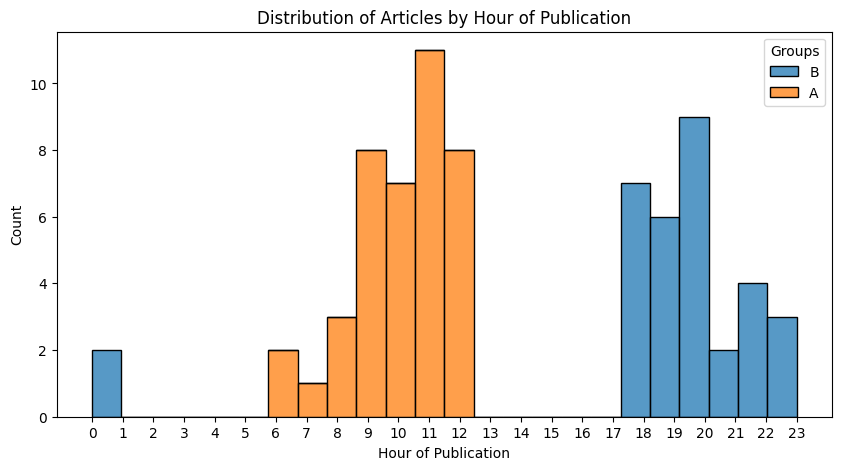

In [53]:
# Histogram showing the distribution of articles by their hour of publication
plt.figure(figsize=(10,5))
sns.histplot(data= data, x='Hour of Publication',hue='Groups', bins=24, multiple='stack',kde=False)
plt.title('Distribution of Articles by Hour of Publication')
plt.xticks(np.arange(0,24))
plt.show()

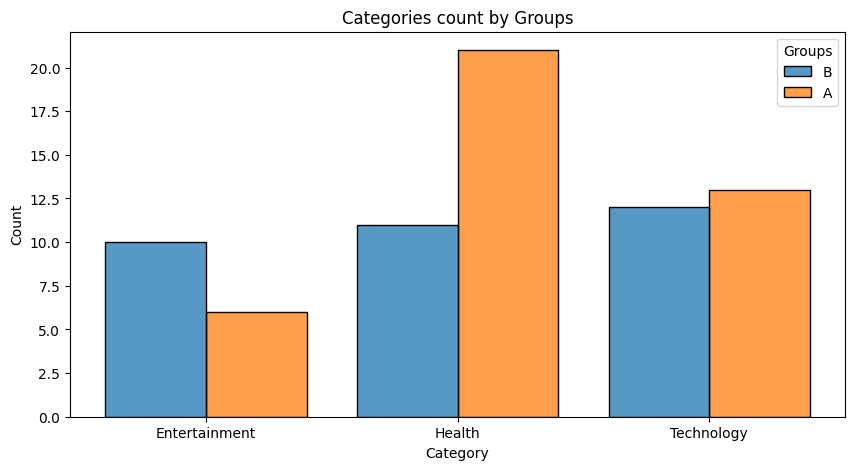

In [54]:
# Histogram of article categories by 'Groups'
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Category', hue='Groups', multiple='dodge', shrink=0.8)
plt.title('Categories count by Groups')
plt.show()

* Enagements

In [55]:
# Average engagement distribution across categories

engagement_by_catgories =  data.groupby('Category')[['Views', 'Likes']].mean()
engagement_by_catgories


C:\Users\BLESSING\AppData\Local\Temp\ipykernel_6048\3692932672.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_catgories =  data.groupby('Category')[['Views', 'Likes']].mean()


,Views,Likes
Category,,
Entertainment,1423.375,434.4375
Health,1269.625,365.0625
Technology,1237.080,394.2400


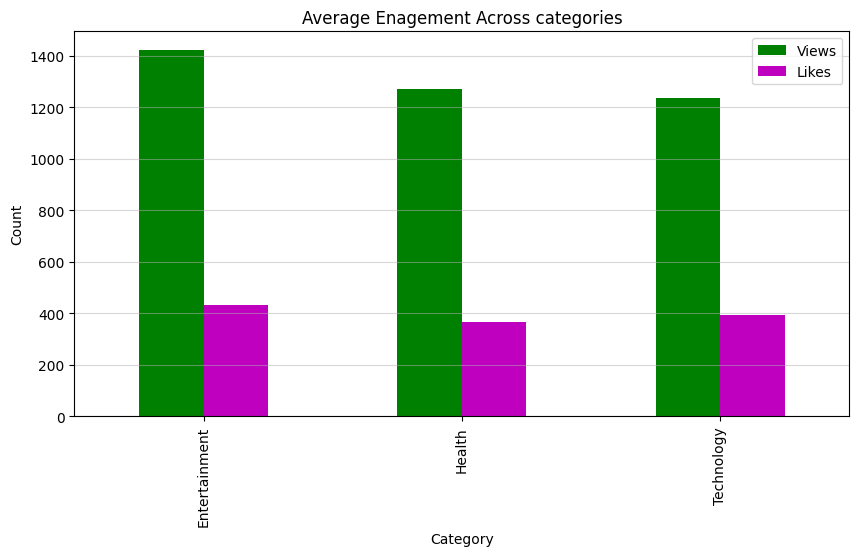

In [56]:
# Bar chart showing average engagement across categories
engagement_by_catgories.plot(kind='bar', figsize=(10,5), color=['g', 'm'])
plt.ylabel('Count')
plt.title('Average Enagement Across categories')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [57]:
"""Outlier in article length:
Four articles were found to have missing values in the content: data[data['Word Count'] == 0], causing their 'Word Count' column to be 0 .
Since these missing values were very few relative to the total dataset and showed no specific pattern, they were treated as Missing Completely At Random (MCAR) and excluded from further analysis. 
This decision was made to ensure that the analysis results remain unbiased and unaffected by incomplete data."""


"Outlier in article length:\nFour articles were found to have missing values in the content: data[data['Word Count'] == 0], causing their 'Word Count' column to be 0 .\nSince these missing values were very few relative to the total dataset and showed no specific pattern, they were treated as Missing Completely At Random (MCAR) and excluded from further analysis. \nThis decision was made to ensure that the analysis results remain unbiased and unaffected by incomplete data."

In [58]:
# Summary statistics of Word Count, Views, and Likes by 'Groups'
data.groupby('Groups')[['Word Count', 'Views', 'Likes']].agg(['mean', 'median', 'std', 'min', 'max'])

Word Count                                  Views                      \
             mean median        std min max         mean  median         std   
Groups                                                                         
A        32.42500   35.0  11.397003   0  44  1240.625000  1264.5  446.943849   
B        34.30303   35.0   2.778093  28  40  1354.666667  1343.0  459.709125   

                        Likes                               
        min   max        mean median         std  min  max  
Groups                                                      
A       503  1952  357.200000  327.5  202.519413   63  889  
B       606  1996  430.333333  401.0  221.724021  108  972

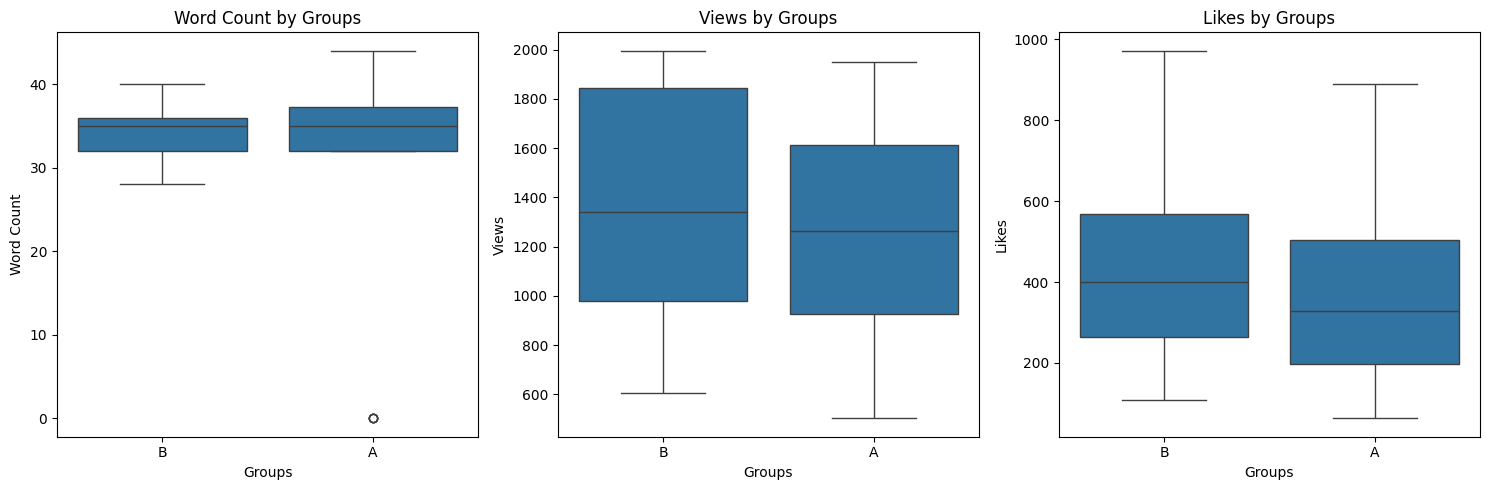

In [59]:
# Boxplots comparing Word Count, Views, and Likes across Groups

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=data['Groups'], y=data['Word Count'], ax=axes[0])
axes[0].set_title('Word Count by Groups')

sns.boxplot(x=data['Groups'], y=data['Views'], ax=axes[1])
axes[1].set_title('Views by Groups')    

sns.boxplot(x=data['Groups'], y=data['Likes'], ax=axes[2])
axes[2].set_title('Likes by Groups')
plt.tight_layout()

plt.show()

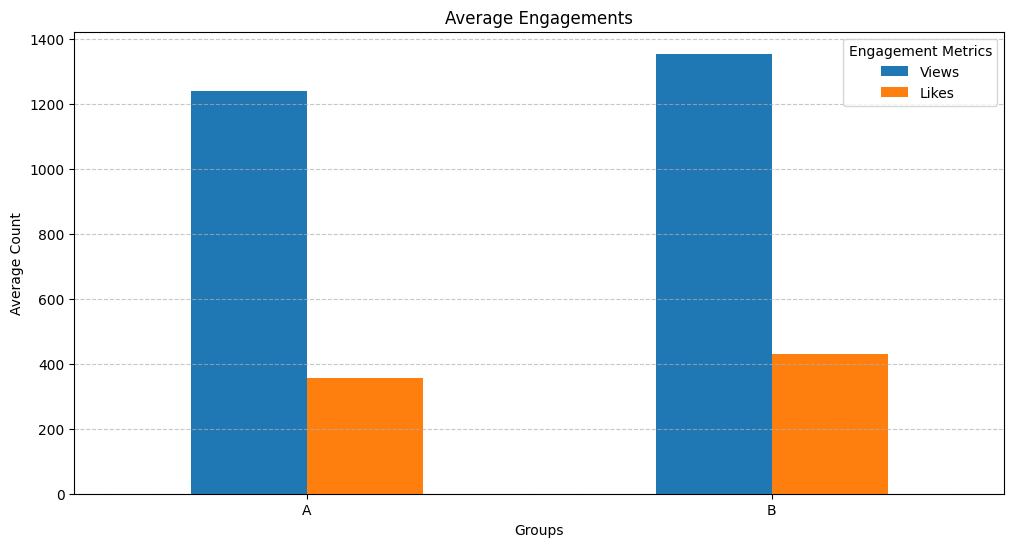

In [60]:
# Bar chart showing average engagement across groups

engagement_mean = data.groupby('Groups')[['Views', 'Likes']].mean().round(1)

engagement_mean.plot(kind='bar', figsize=(12,6))

plt.title('Average Engagements')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Engagement Metrics')

plt.show()

* Correlation

In [61]:
# The correlation between Word Count, Views, and Likes
data[['Word Count', 'Views', 'Likes']].corr()


,Word Count,Views,Likes
Word Count,1.000000,-0.050563,-0.189596
Views,-0.050563,1.000000,0.668272
Likes,-0.189596,0.668272,1.000000


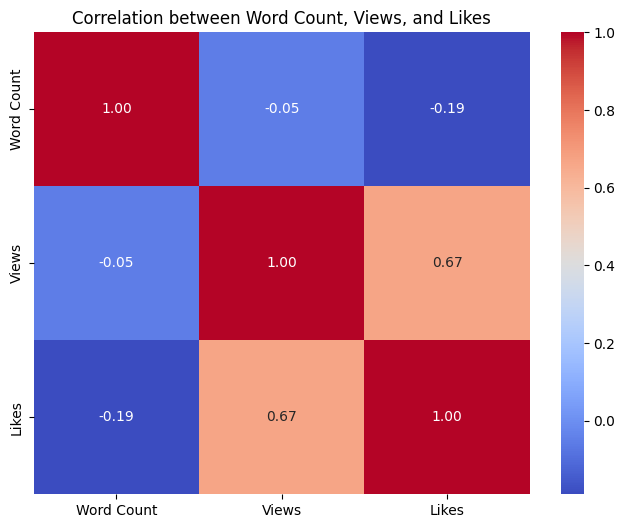

In [62]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Word Count', 'Views', 'Likes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Word Count, Views, and Likes')     
plt.show()

[]

<Figure size 1200x600 with 0 Axes>

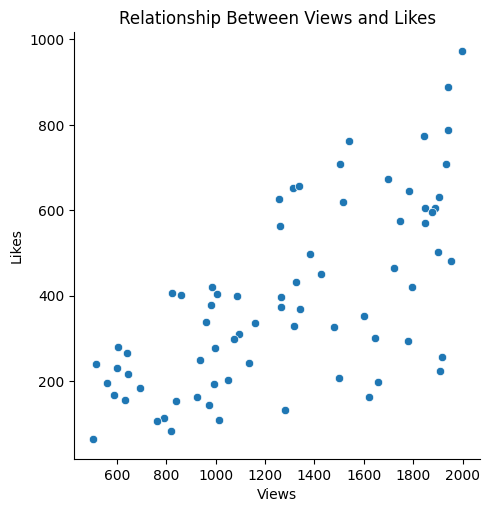

In [63]:
# Scatter plot showing the relationship between Views and Likes
plt.figure(figsize=(12,6))
sns.relplot(kind='scatter', x=data['Views'], y=news['Likes'])
plt.title('Relationship Between Views and Likes')
plt.plot()

Statistical test

*	Null Hypothesis (H₀): There is no significant difference in engagement between Group A and Group B.
*	Alternative Hypothesis (H₁): There is a significant difference in engagement between Group A and Group B.


In [64]:
# Perform an independent t-test to compare the mean views between Group A and Group B

t_statistics, p_value  = stats.ttest_ind(data[data['Groups'] == "A"]['Views'], data[data['Groups'] == 'B']['Views'])

print(f"T-statistics: {t_statistics}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There's a significant difference in views between Group A and Group B")
else:
    print("Fail to reject the null hypothesis. No significant difference in views between Group A and Group B")

T-statistics: -1.0711209868631142, P-value: 0.2877426500698424
Fail to reject the null hypothesis. No significant difference in views between Group A and Group B


In [65]:
# Perform an independent t-test to compare the mean likes between Group A and Group B

t_statistics,p_value = stats.ttest_ind(data[data['Groups'] == 'A']['Likes'], data[data['Groups'] == 'B']['Likes'])

print(f"T-statistics: {t_statistics}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There's a significant difference in likes between Group A and Group B")
else:
    print("Fail to reject the null hypothesis. No significant difference in likes between Group A and Group B")

T-statistics: -1.4711407435710295, P-value: 0.14567147030822275
Fail to reject the null hypothesis. No significant difference in likes between Group A and Group B
